# MODELO XGBOOST
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns
%matplotlib inline

## Cargamos los datos de entrada del archivo .csv Train

In [17]:
# Load data
train = pd.read_csv('../data/Processed/train_processed.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,...,1,0,0,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,...,0,1,0,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,1,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,1,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,0,...,1,0,1,0,0,0,0,0,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,1,...,0,1,0,0,0,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,1,...,0,1,0,0,0,0,0,0,1,0
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,0,...,0,1,0,0,0,0,1,0,0,0


In [18]:
# Definimos las variables que me guardan los datos a entrenar separados del target 
y=df_train['Transported']

X=df_train[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Earth', 'Europa', 'Mars', 'Cabin_num',
       'Cabin_Side_P', 'Cabin_Side_S', 'Cabin_Deck_A', 'Cabin_Deck_B',
       'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E', 'Cabin_Deck_F',
       'Cabin_Deck_G', 'Cabin_Deck_T']]

In [19]:
#Separamos los datos 70% Train, 30% Test (Es la proporcion pedida en Kaggel)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6085, 22)	y_train: (6085,)
X_test: (2608, 22)	y_test: (2608,)


- **GRADIENT BOOSTING CLASSIFIER**

In [20]:
#Creamos el modelo Gradient boost classifier y entrenamos los datos
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

GBC = GradientBoostingClassifier(max_depth = 2, n_estimators = 650, learning_rate=0.1)
GBC.fit(X_train, y_train)

print('MODELO GRADIENT BOOST')
print(f'Accuracy train: {GBC.score(X_train, y_train)}')
print(f'Accuracy test: {GBC.score(X_test, y_test)}')

MODELO GRADIENT BOOST
Accuracy train: 0.8369761709120789
Accuracy test: 0.8174846625766872


In [21]:
# Definimos la matriz de confusion
y_pred=GBC.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
cm

array([[1026,  270],
       [ 206, 1106]], dtype=int64)

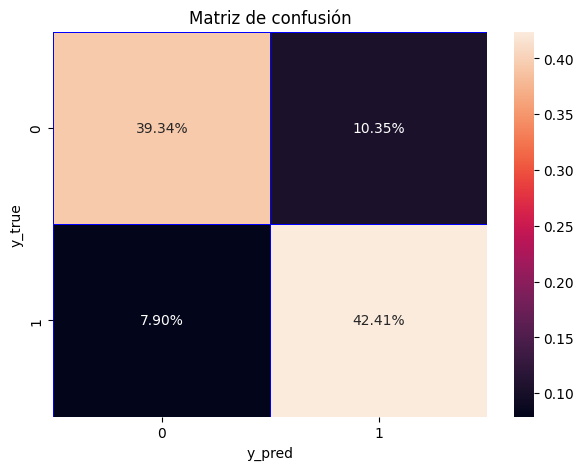

In [22]:
# Gráfica de la matriz de confusión
f, ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, linewidths=0.5, fmt='.2%', linecolor="blue")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Matriz de confusión")
plt.show()

In [23]:
def graph_feat(model,X):
    feat_impor = pd.DataFrame(model.feature_importances_)
    fimport = feat_impor.set_axis(X.columns, axis='index')
    fimport.sort_values(by=[0], ascending= False, inplace = True)
    fig = plt.figure(figsize=(12, 8))
    plt.barh(fimport.index, fimport[0])
    plt.xlabel('Feature Importances')
    plt.xticks(rotation = 90)
    plt.ylabel('Feature Labels')
    plt.title('Comparacion de la importancia de las variables')
    return plt.show()


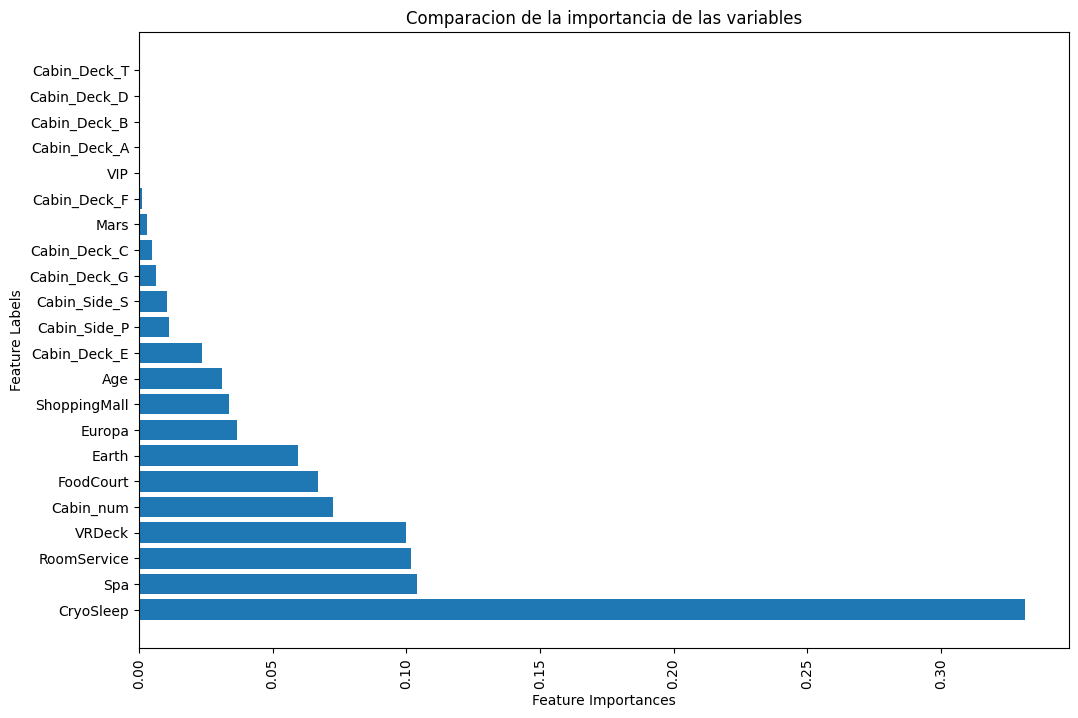

In [24]:
graph_feat(GBC, X_train)

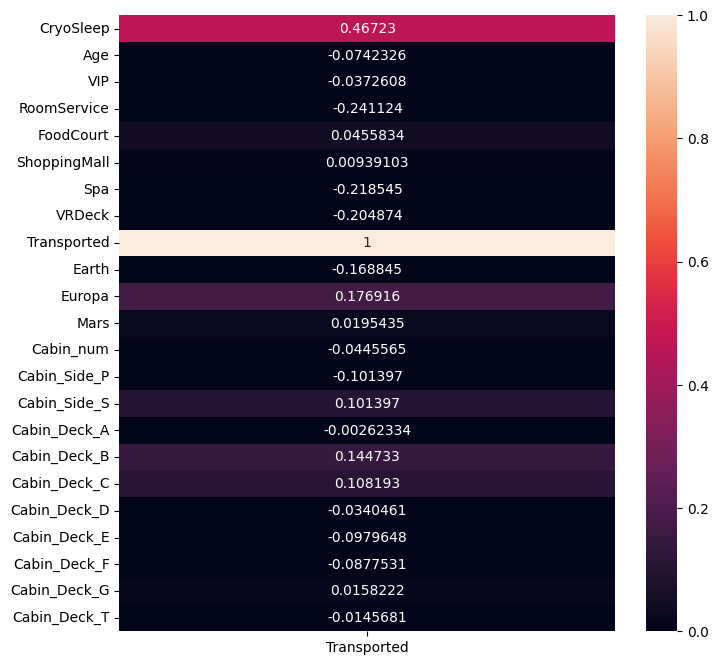

In [25]:
# Mapas de correlacion
corrMatrix = df_train.corr()

df2 = pd.DataFrame(corrMatrix['Transported'],
              index=corrMatrix.index)
fig = plt.figure(figsize=(8, 8))

sns.heatmap(df2, annot=True, fmt="g", vmin = 0, vmax= 1)
plt.savefig('correlationma.png')
plt.show()

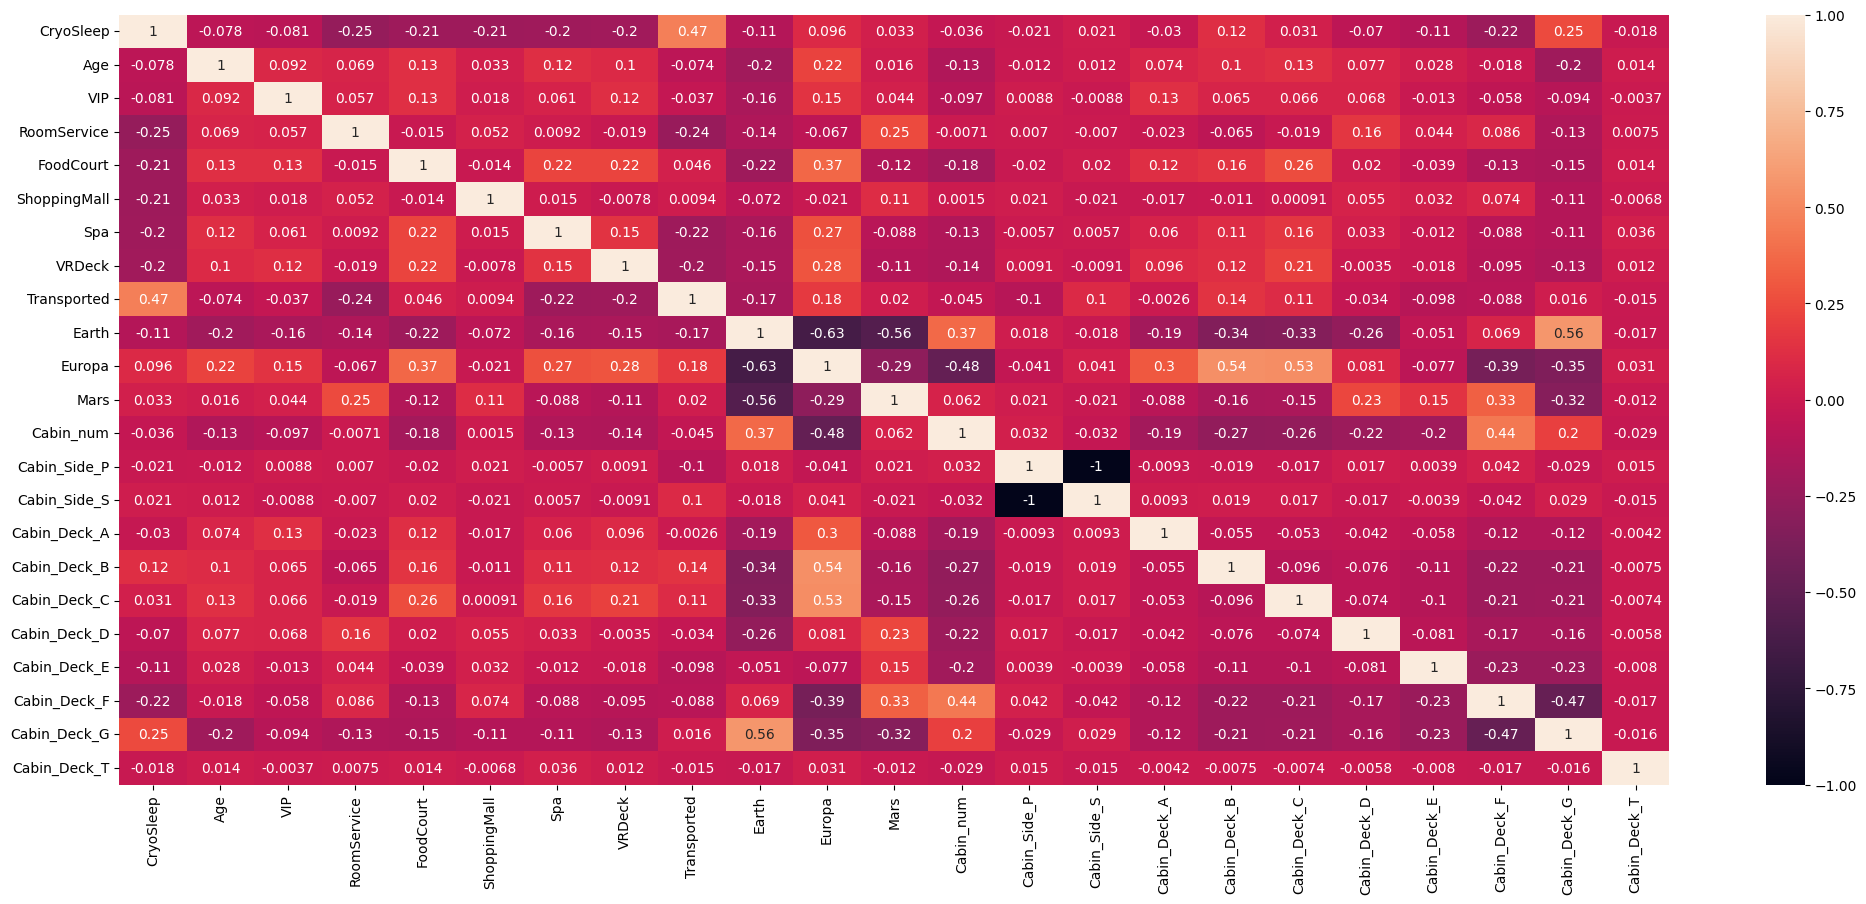

In [26]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df_train.corr(), vmin = -1, vmax = 1, annot = True, );


## Cargamos los datos de entrada del archivo .csv Test

In [27]:
# Load data

test = pd.read_csv('../data/Processed/test_processed.csv', sep=',')
df_test=pd.DataFrame(test)
df_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,1,0
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,0,...,1,0,0,0,0,0,0,0,1,0
4274,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,0
4275,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [28]:
testID = pd.read_csv('../data/Raw/test.csv', sep=',')

In [29]:
# Aplicamos el modelo a los datos del csv test y lo guardamos cm csv nuevo para mandarlo a kaggel

prediccion_test = pd.DataFrame(GBC.predict(df_test))
prediccion_test['PassengerId'] =testID['PassengerId']
prediccion_test = prediccion_test.rename(columns = {0:'Transported'})
prediccion_test = prediccion_test[['PassengerId','Transported']]
prediccion_test.to_csv('../data/output/GBC.csv', index=False)
prediccion_test

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
